In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

In [2]:
# function to compute trapezium rule of I
def trapezium(f, df, N, z_tilde, R, b):
    total = 0
    for n in range(N):
        exp = np.exp(1j*2*np.pi*n/N)
        contour = z_tilde + R*exp
        total += df(contour, N=N) * (contour**b) * exp/ f(contour)
    return R*total/N

# function of root finder
def root_finder(f, df, z_tilde, R, N):
    m0 = round(np.real(trapezium(f, df, N, z_tilde, R, 0)))
    if m0>=1:
        z0 = trapezium(f, df, N, z_tilde, R, 1)/m0
        return z0, m0

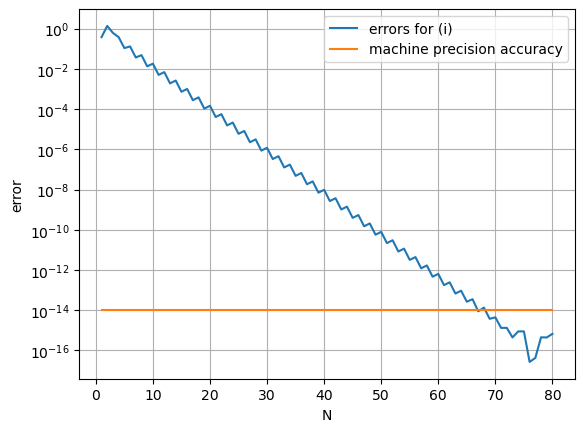

In [3]:
# functions for part(i)
def golden_ratio_f(z):
    return z**2 - z - 1
def golden_ratio_df(z, N=None):
    return 2*z - 1

# parameters
N = 80
R = 1
z_tilde = 1
# True value
z0 = (1+np.sqrt(5))*0.5

# errors
errors = []
for n in range(1,N+1):
    errors.append(abs(root_finder(golden_ratio_f, golden_ratio_df, z_tilde, R, n)[0]-z0))

# plot
plt.semilogy(np.arange(1,N+1), errors, label='errors for (i)')
plt.plot(np.arange(1,N+1), 1e-14*np.ones(N),label='machine precision accuracy')
plt.xlabel('N')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.savefig('golden_ratio.png')
plt.show()


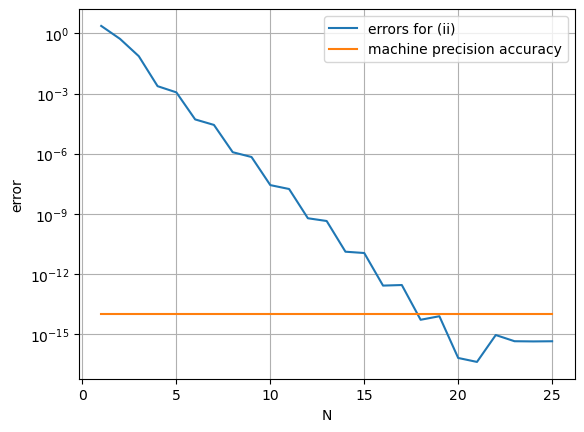

In [4]:
# functions for part(ii)
def my_f(z):
    return (1+np.exp(1j*z))/np.exp(1j*z)
def my_df(z, N=None):
    return -1j*np.exp(-1j*z)

# parameters
N = 25
R = 1
z_tilde = 3
# True value
z0 = np.pi

# errors
errors = []
for n in range(1,N+1):
    errors.append(abs(root_finder(my_f, my_df, z_tilde, R, n)[0]-z0))

# plot
plt.semilogy(np.arange(1,N+1), errors, label='errors for (ii)')
plt.plot(np.arange(1,N+1), 1e-14*np.ones(N),label='machine precision accuracy')
plt.xlabel('N')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.savefig('(ii).png')
plt.show()

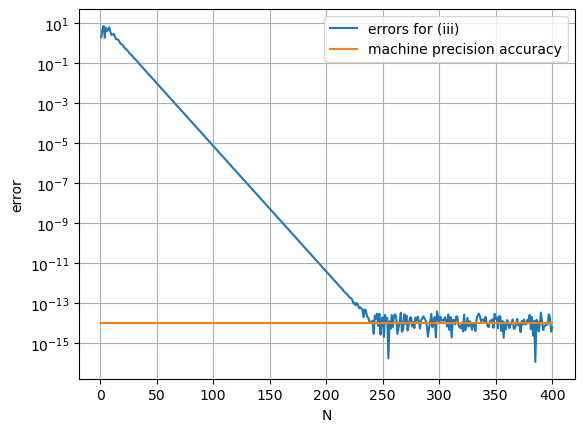

In [5]:
# function to compute derivative of zeta function
# by using Cauchy's integral formula and trapezium rule
def zeta_df(z,N):
    total = 0
    for n in range(N):
        exp = np.exp(1j*2*np.pi*n/N)
        total += zeta(z+exp/10) / exp
    return 10*total/N

# parameters
N = 400
R = 1
z_tilde = 0.5+15j
# True value
z0 = 0.5 + 14.13472514173469j

# errors
errors = []
for n in range(1,N+1):
    errors.append(abs(root_finder(zeta, zeta_df, z_tilde, R, n)[0]-z0))

# plot
plt.semilogy(np.arange(1,N+1), errors, label='errors for (iii)')
plt.plot(np.arange(1,N+1), 1e-14*np.ones(N),label='machine precision accuracy')
plt.xlabel('N')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.savefig('(iii).png')
plt.show()
